Import module

In [218]:
!pip freeze > requirements.txt

In [215]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

Load data

In [216]:
df = yf.download("MSFT", start="2000-01-01", end="2023-12-31")
# Create sequences
from copy import deepcopy as dc

def prepare_dataframe(df, n_steps):
    df = dc(df)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
    df.drop(columns=columns, inplace=True)
    X, y = df.drop('Close', axis=1), df['Close']
    return X, y
n_steps = 15
X,y = prepare_dataframe(df, n_steps)
X.head()

[*********************100%%**********************]  1 of 1 completed


,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10),Close(t-11),Close(t-12),Close(t-13),Close(t-14),Close(t-15)
Date,,,,,,,,,,,,,,,
2000-01-25,50.62500,51.87500,53.00000,53.50000,57.65625,56.12500,53.90625,52.90625,54.68750,56.12500,55.71875,55.00000,56.90625,56.31250,58.28125
2000-01-26,51.40625,50.62500,51.87500,53.00000,53.50000,57.65625,56.12500,53.90625,52.90625,54.68750,56.12500,55.71875,55.00000,56.90625,56.31250
2000-01-27,49.68750,51.40625,50.62500,51.87500,53.00000,53.50000,57.65625,56.12500,53.90625,52.90625,54.68750,56.12500,55.71875,55.00000,56.90625
2000-01-28,49.37500,49.68750,51.40625,50.62500,51.87500,53.00000,53.50000,57.65625,56.12500,53.90625,52.90625,54.68750,56.12500,55.71875,55.00000
2000-01-31,49.12500,49.37500,49.68750,51.40625,50.62500,51.87500,53.00000,53.50000,57.65625,56.12500,53.90625,52.90625,54.68750,56.12500,55.71875


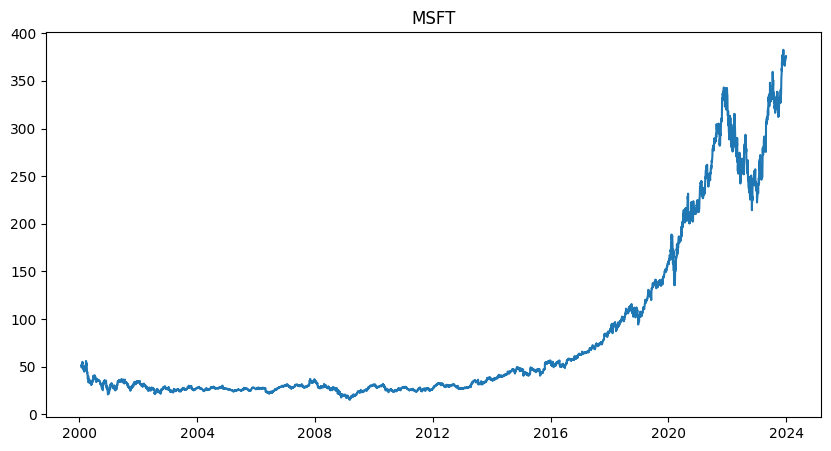

In [181]:
plt.figure(figsize=(10,5))
plt.plot(y.index,y)
plt.title('MSFT')
plt.show()

Time Series Splits

In [182]:
N_SPLITS =10
tscv = TimeSeriesSplit(n_splits=N_SPLITS)

In [183]:
model = LinearRegression()

RMSE: 0.5764934084472639, R2: 0.8684379377167127


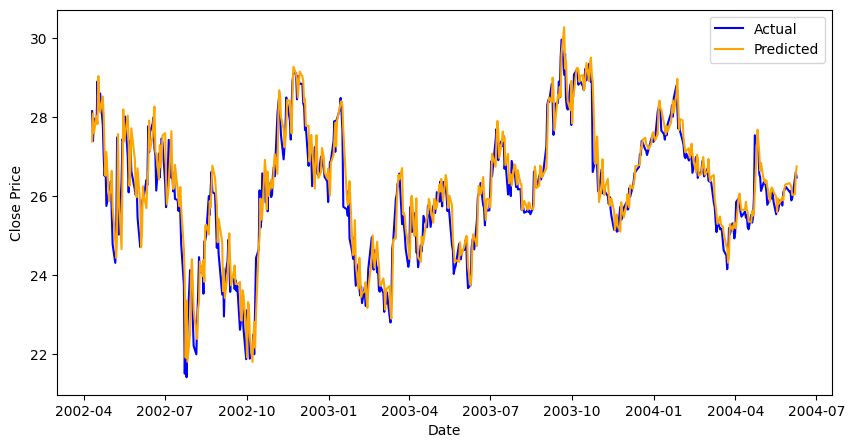

RMSE: 0.5310368239927304, R2: 0.9550918866990799


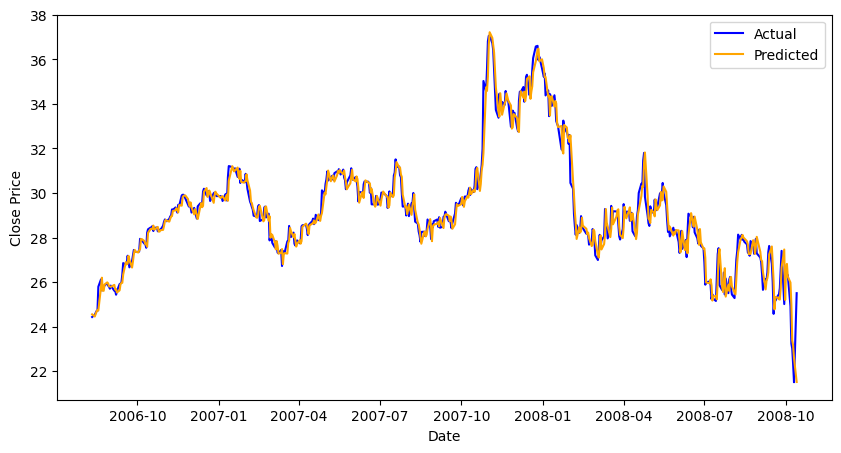

RMSE: 0.3777546876221096, R2: 0.972023698949402


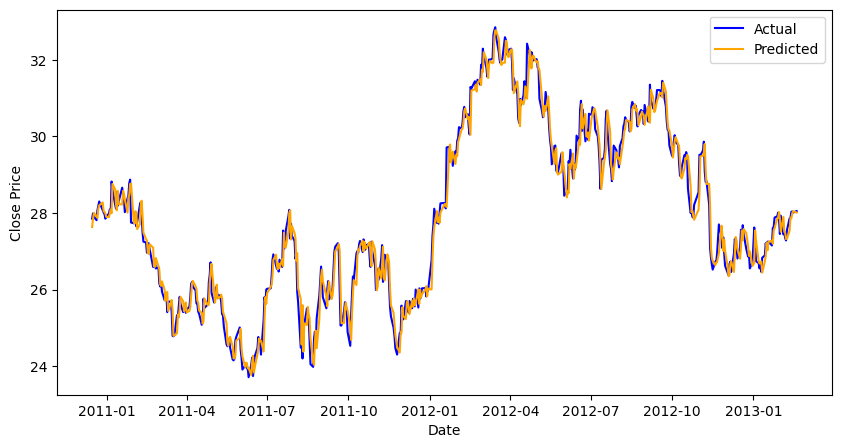

RMSE: 0.7752769427899637, R2: 0.989251405643777


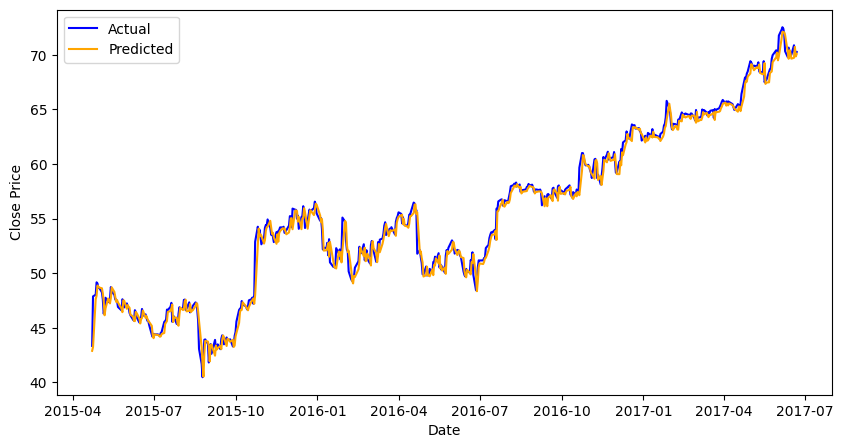

RMSE: 3.795923860498381, R2: 0.9940254715131958


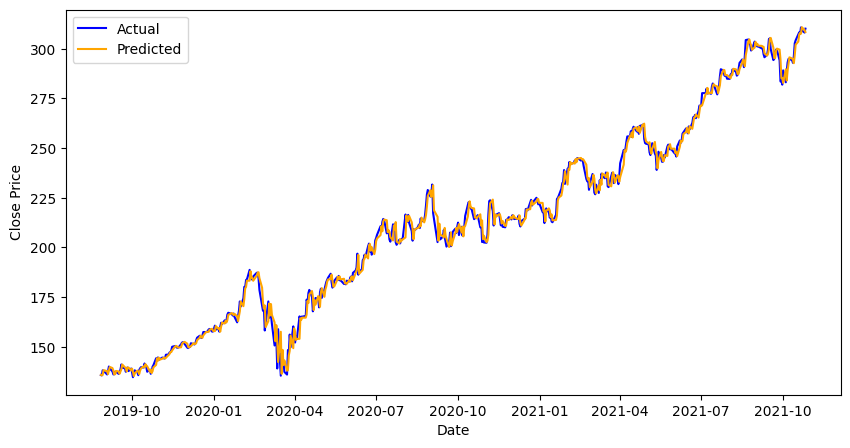

In [184]:
for i,(train_index, test_index) in enumerate(tscv.split(X)):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the model

    model.fit(x_train, y_train)
    # Make predictions and evaluate the model
    predictions = model.predict(x_test)

    # Plot the actual vs predicted values
    if i % 2 == 0:
        rmse = sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)
        print(f'RMSE: {rmse}, R2: {r2}')
        plt.figure(figsize=(10, 5))
        plt.plot(y_test.index, y_test, label='Actual',color = 'blue')
        plt.plot(y_test.index, predictions, label='Predicted', color = 'orange')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

Test with non-training data

In [185]:
test_df = yf.download("AAPL", start="2000-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [186]:
X_test, y_test = prepare_dataframe(test_df, n_steps)

In [187]:
predictions = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f'MSE: {rmse}, R2: {r2}')

MSE: 1.1423275288675285, R2: 0.9994998799430936


In [188]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

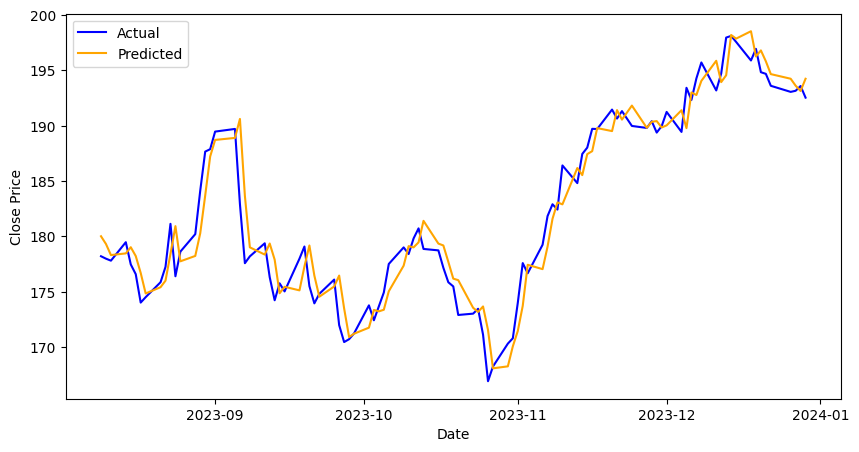

In [189]:
plt.figure(figsize=(10, 5))
plt.plot(results['Actual'][-100:], label='Actual',color = 'blue')
plt.plot(results['Predicted'][-100:], label='Predicted', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Random Split

In [190]:
x, x_test, y, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

In [191]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [192]:
pred = model.predict(x_train)
rmse = sqrt(mean_squared_error(pred,y_train))
r2 = r2_score(pred,y_train)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 1.3745908857325768, R2: 0.9994481154531338


In [193]:
results = pd.DataFrame({'Actual':y_train, 'Predicted':pred})
results.sort_index(inplace=True)

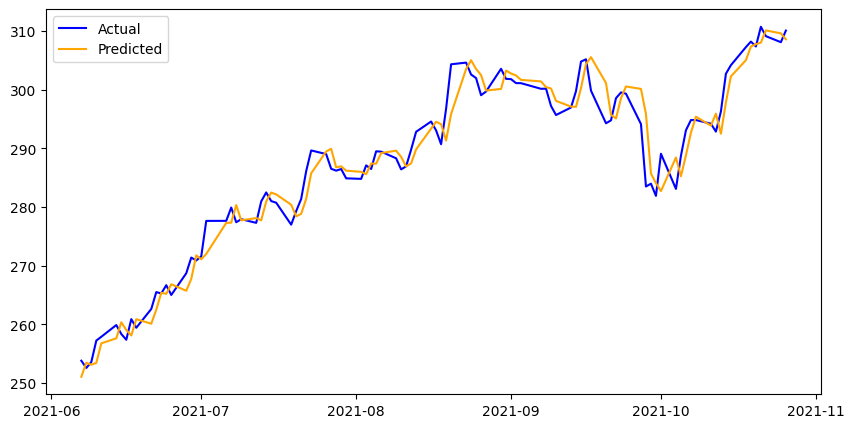

In [194]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label = 'Actual',color = 'blue')
plt.plot(results['Predicted'][-100:],label = 'Predicted',color = 'orange')
plt.legend()
plt.show()

In [195]:
pred = model.predict(x_test)
rmse = sqrt(mean_squared_error(pred,y_test))
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 2.1940999870900604, R2: 0.9994182436903691


In [196]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

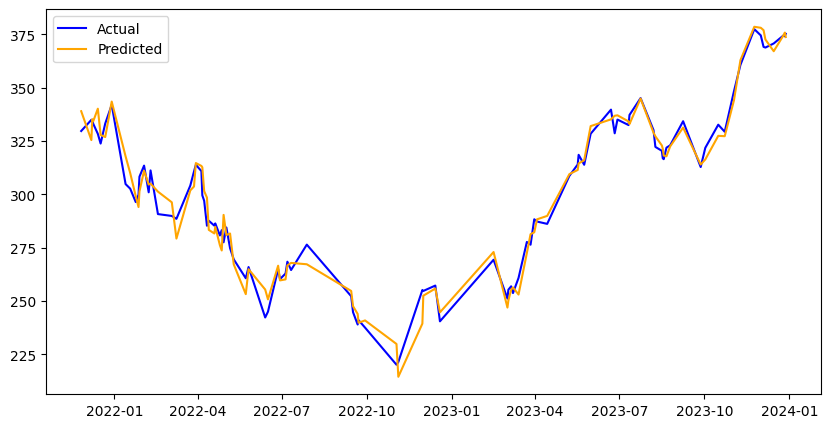

In [197]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label = 'Actual',color = 'blue')
plt.plot(results['Predicted'][-100:],label = 'Predicted',color = 'orange')
plt.legend()
plt.show()

Test with non-training data

In [198]:
test_df = yf.download("AAPL", start="2000-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [199]:
X_test, y_test = prepare_dataframe(test_df, n_steps)

In [200]:
pred = model.predict(X_test)

In [201]:
rmse = sqrt(mean_squared_error(pred,y_test))
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 1.1423275288675285, R2: 0.999500867032745


In [202]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

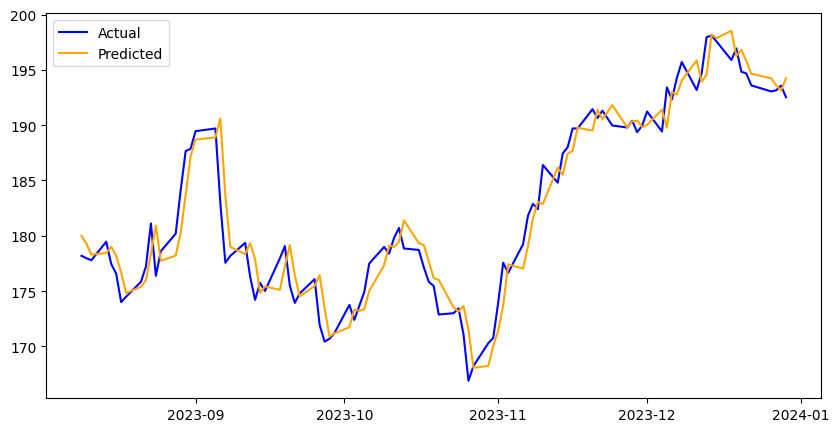

In [203]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label = 'Actual',color = 'blue')
plt.plot(results['Predicted'][-100:],label = 'Predicted',color = 'orange')

plt.legend()
plt.show()

GridSearch

In [204]:
data = yf.download("MSFT", start="2000-01-01", end="2023-12-31")
X,y = prepare_dataframe(data, n_steps)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

[*********************100%%**********************]  1 of 1 completed


In [205]:
ridge_params = {'alpha': [10**i for i in range(-10,10)]}
lasso_params = {'alpha': [10**1 for i in range(-10,10)]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=3)

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

print(f'Best Ridge Params: {ridge_grid.best_params_}')
print(f'Best Lasso Params: {lasso_grid.best_params_}')

Best Ridge Params: {'alpha': 1000}
Best Lasso Params: {'alpha': 10}


RIDGE

In [206]:
model = Ridge(alpha = ridge_grid.best_params_['alpha'])

In [207]:
model.fit(X_train,y_train)

Ridge(alpha=1000)

In [208]:
pred = model.predict(X_train)
rmse = sqrt(mean_squared_error(pred,y_train))
r2 = r2_score(pred,y_train)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 2.072833672378792, R2: 0.999456246816447


In [209]:
resutls = pd.DataFrame({'Actual':y_train, 'Predicted':pred})
resutls.sort_index(inplace=True)

Text(0.5, 1.0, 'Ridge')

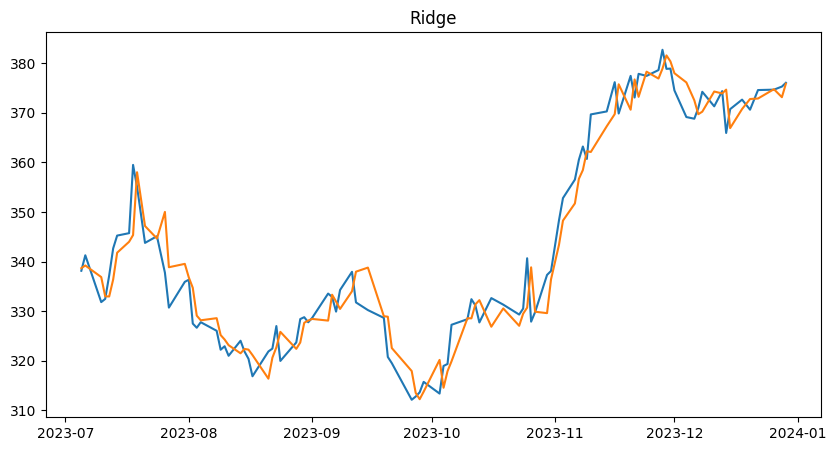

In [210]:
plt.figure(figsize=(10,5))
plt.plot(resutls['Actual'][-100:],label ='Actual')
plt.plot(resutls['Predicted'][-100:],label = 'Predicted')
plt.title('Ridge')

In [211]:
pred = model.predict(X_test)

In [212]:
rmse = sqrt(mean_squared_error(pred,y_test))
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse},R2: {r2}')

RMSE: 2.128521906828978,R2: 0.999427829225844


In [213]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

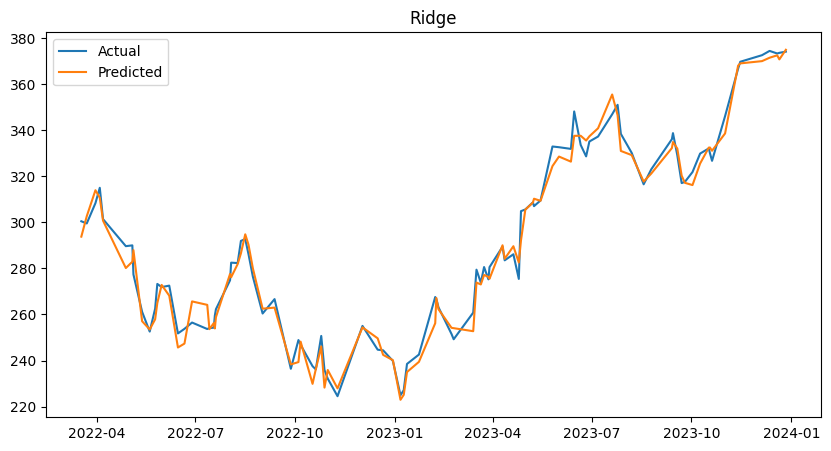

In [169]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label ='Actual')
plt.plot(results['Predicted'][-100:],label = 'Predicted')
plt.title('Ridge')
plt.legend()
plt.show()

LASSO

In [170]:
model = Lasso(alpha=lasso_grid.best_params_['alpha'])

In [171]:
model.fit(X_train,y_train)

Lasso(alpha=10)

In [172]:
pred = model.predict(X_train)
rmse = sqrt(mean_squared_error(pred,y_train))
r2 = r2_score(pred,y_train)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 2.114671486916402, R2: 0.9994327624885894


In [173]:
resutls = pd.DataFrame({'Actual':y_train, 'Predicted':pred})
resutls.sort_index(inplace=True)

Text(0.5, 1.0, 'LASSO')

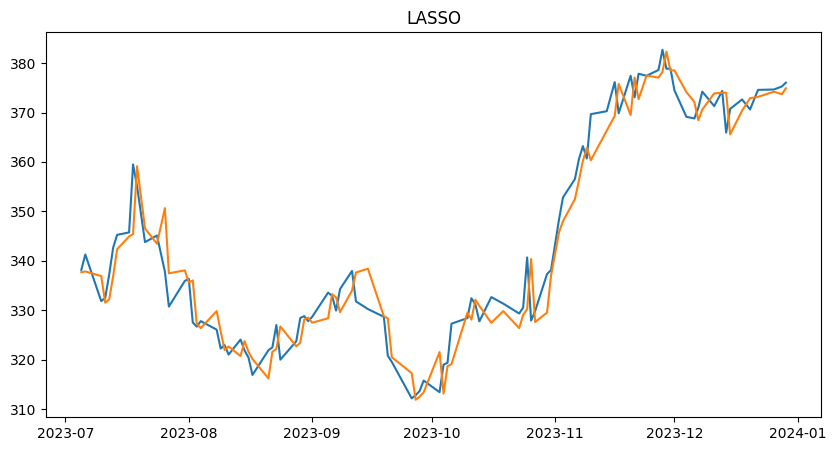

In [174]:
plt.figure(figsize=(10,5))
plt.plot(resutls['Actual'][-100:],label ='Actual')
plt.plot(resutls['Predicted'][-100:],label = 'Predicted')
plt.title('LASSO')

In [175]:
pred = model.predict(X_test)

In [176]:
rmse = sqrt(mean_squared_error(pred,y_test))
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse},R2: {r2}')

RMSE: 2.126091859768311,R2: 0.9994280625734221


In [177]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

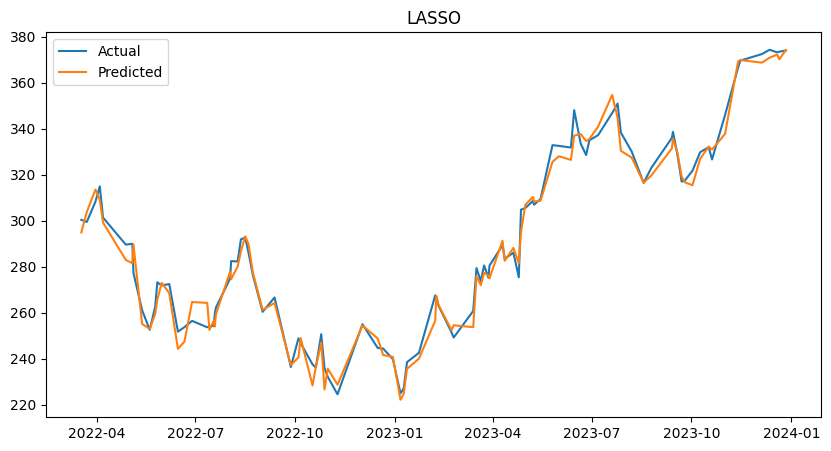

In [178]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label ='Actual')
plt.plot(results['Predicted'][-100:],label = 'Predicted')
plt.title('LASSO')
plt.legend()
plt.show()